In [82]:
%matplotlib inline

import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.utils import np_utils
#from keras.utils.vis_utils import model_to_dot
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [83]:
# load data set 
data = np.load('X.npy') 
target = np.load('Y.npy') 

In [84]:
Y = np.zeros(data.shape[0]) 
Y[:204] = 9 
Y[204:409] = 0
Y[409:615] = 7 
Y[615:822] = 6 
Y[822:1028] = 1 
Y[1028:1236] = 8 
Y[1236:1443] = 4 
Y[1443:1649] = 3 
Y[1649:1855] = 2 
Y[1855:] = 5 

In [85]:
data = data.reshape(2062, 64*64)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size = 0.2, random_state = 2)

In [87]:
#estimator = LinearSVC(C=1.0)
estimator = RandomForestClassifier()
estimator.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
print(estimator.score(X_test, y_test))

0.6900726392251816


In [89]:
X_test.shape

(413, 4096)

In [90]:
X_test[0].shape

(4096,)

In [91]:
estimator.predict(X_test[2].reshape(1,4096))

array([7.])

In [92]:
def img_show(data, n, number_size, label):
    plt.subplot(numbers_size, numbers_size, n)
    
    Z = data.reshape(64, 64)
    
    Z = Z[::-1,:]
    plt.xlim(0, 64-1)
    plt.ylim(0, 64-1)
    plt.pcolor(Z)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.6)

    plt.gray()
    plt.title(label)
    plt.tick_params(labelbottom='off')
    plt.tick_params(labelleft='off')

In [93]:
import warnings
warnings.filterwarnings('ignore')

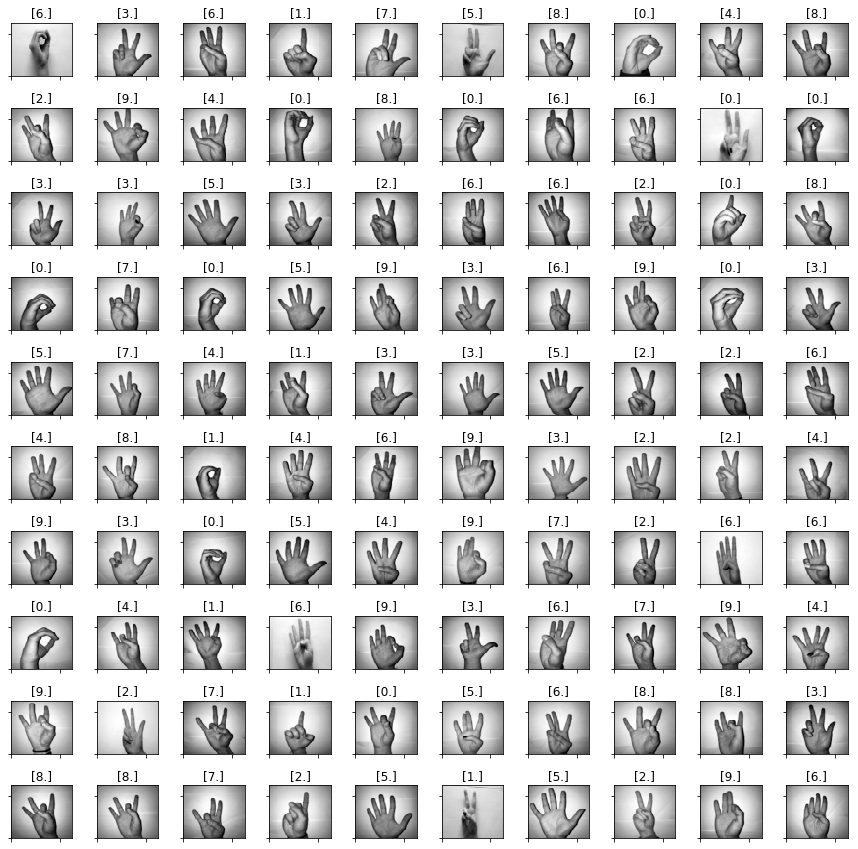

In [94]:
numbers_size = 10
plt.figure(figsize=(15, 15))

for cnt, idx in enumerate(np.random.permutation(len(X_test))[:numbers_size**2]):
    y = estimator.predict(X_test[idx].reshape(1,4096))
    #print(np.argmax(y))
    img_show(X_test[idx], cnt+1, numbers_size, y)

In [95]:
# グリッドサーチでハイパーパラメータを探す
from sklearn.model_selection import GridSearchCV

In [97]:
# グリッドサーチ(パラメータ候補指定)用のパラメータ10種
params = {
        'max_depth': [1,2,3,4,5,6,7,8,9,10,None],　#木の深さ
        'criterion': ['gini', 'entropy'],　#分割基準
        'n_estimators':[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]　#バギングに用いる決定木の個数
    }

In [98]:
RFC_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=params, cv=10)

In [99]:
RFC_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'criterion': ['gini', 'entropy'], 'n_estimators': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [100]:
print(RFC_grid.score(X_test, y_test))

0.7796610169491526
